In [1]:
# 구글드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

# 작업 디렉토리 설정
import os
os.chdir('/content/drive/MyDrive/PyStat')

Mounted at /content/drive


In [2]:
# 객체 내용/타입 출력
def printobj(*a):
    for x in a:
        display(x)
        print('\n', type(x), '\n')

# 추론 통계

<details><summary>추론 통계(inferential statistics) : 수집한 데이터를 바탕으로 추론, 예측하는 통계 기법
</summary>

- 모집단/표본
- 확률변수
- 확률분포
- 표본분포
- 추정/검정

## CHAP 9. 독립동일분포

- 2차원 $→$ 다차원

- 독립

- 독립 & 다차원

- 4장 A학생의 예

- 1차원 확률변수

- 관계없이 만난 학생

- 독립 20차원 확률변수

- **독립동일분포**(independently and identically distributed, i.i.d.)
  - $X_{1}, X_{2}, ⋯, X_{20} \overset{iid}{∼} F$

- 기본적이고 중요한 조건 설정

- 임포트

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# 결과의 재현성을 위해 난수 시드 생성
np.random.seed(0)

# 소수점 이하 3자리까지 출력
%precision 3
np.set_printoptions(precision=3, suppress=True)

# 그래프가 Jupyter Notebook 위에 표시되도록 설정
%matplotlib inline

- 함수 준비

In [4]:
linestyles = ['-', '--', ':', '-.']

def E(XY, g):
    x_set, y_set, f_XY = XY
    return np.sum([g(x_i, y_j) * f_XY(x_i, y_j)
                   for x_i in x_set for y_j in y_set])

def Cov(XY):
    x_set, y_set, f_XY = XY
    mean_X = E(XY, lambda x, y: x)
    mean_Y = E(XY, lambda x, y: y)
    return np.sum([(x_i - mean_X) * (y_j - mean_Y) * f_XY(x_i, y_j)
                   for x_i in x_set for y_j in y_set])

def f_X(x):
    return np.sum([f_XY(x, y_k) for y_k in y_set])

def f_Y(y):
    return np.sum([f_XY(x_k, y) for x_k in x_set])

### 9-1. 독립성

#### 1) 독립성의 정의

- **독립성**(independence)

$$ f_{XY}(x, y) = f_X(x)f_Y(y) \tag{9-1} $$

- 구체적인 예
  - 불공정한 주사위 2개는 서로 독립

- $(X,Y)$의 결합확률함수

$$
f_{XY}(x, y) =
\begin{cases}
\cfrac{xy}{441} & (x \in \{1,2,3,4,5,6\}, \, y \in \{1,2,3,4,5,6\}) \\\\
0 & (otherwise)
\end{cases}
\tag{9-2}
$$

- $X$와 $Y$의 확률함수

$$
\begin{align}
f_X(x) & =
\begin{cases}
\cfrac{x}{21} & (x \in \{1,2,3,4,5,6\}) \\\\
0 & (otherwise)
\end{cases}
\\\\
f_Y(y) & =
\begin{cases}
\cfrac{y}{21} & (y \in \{1,2,3,4,5,6\}) \\\\
0 & (otherwise)
\end{cases}
\end{align}
\tag{9-3}
$$

- $f_XY(X,Y)=f_X(x)f_Y(y)$ 성립

- $n$차원 확률변수로 일반화

> **독립성**

> $n$개의 확률변수 $X_1$, $X_2$, $⋯$, $X_n$이
> - 다음을 만족할 때, $X_1$, $X_2$, $⋯$, $X_n$은 서로 독립이라고 한다.<br><br>
>
> $$
> f_{X_1X_2⋯X_n}(x) = f_{X_1}(x_1)f_{X_2}(x_2)⋯f_{X_n}(x_n) \tag{9-4}
> $$<br>
>
> 여기서, 함수 $f$가 이산형이면 확률함수, 연속형이면 밀도함수를 나타낸다.

#### 2) 독립성과 무상관성

- 공분산 / 상관계수

- 공분산 $=$ 상관계수 $=0 \;\;→\;\;$ 무상관

- 독립성 &nbsp; vs &nbsp; 무산관성

- 독립성 $≫$ 무상관성

- 독립 $→$ 무상관 $\nrightarrow$ 독립

- 파이썬 구현

In [5]:
x_set = np.array([1, 2, 3, 4, 5, 6])
y_set = np.array([1, 2, 3, 4, 5, 6])

def f_XY(x, y):
    if x in x_set and y in y_set:
        return x * y / 441
    else:
        return 0

XY = [x_set, y_set, f_XY]

- 독립 $\overset{?}{→}$ 무상관

In [6]:
Cov(XY)

-8.326672684688674e-17

- 독립 $\overset{\underset{\mathrm{OK}}{}}{→}$ 무상관

- 무상관이나 독립아닌 예제
  - 값의 조합 : $\{ (0,0), (1,1), (1,-1) \}$
  - 확률 동일한 결합확률함수

$$
f_{XY}(x, y) =
\begin{cases}
\cfrac{1}{3} & (x,y) \in \{(0,0),(1,1),(1,-1)\} \\\\
0 & (otherwise)
\end{cases}
\tag{9-5}
$$

- 파이썬 구현

In [7]:
x_set = np.array([0, 1])
y_set = np.array([-1, 0, 1])

def f_XY(x, y):
    if (x, y) in [(0, 0), (1, 1), (1, -1)]:
        return 1 / 3
    else:
        return 0

XY = [x_set, y_set, f_XY]

- 공분산 계산

In [8]:
Cov(XY)

0.0

- 무상관 $\overset{?}{→}$ 독립

- 독립성의 정의 : &nbsp;&nbsp;&nbsp; $∀x,\;\;∀y$

$$f_{XY}(x, y) = f_X(x)f_Y(y)$$

- $x=0,\;\;y=0$

$$ f_{XY}(0, 0) = f_X(0)f_Y(0) $$

In [9]:
f_X(0) * f_Y(0), f_XY(0, 0)

(0.1111111111111111, 0.333)

- 무상관 $\nrightarrow$ 독립

### 9-2. 합의 분포

- $X_{1}, X_{2}, ⋯, X_{20} \overset{iid}{∼} F$

- 확률변수 $\bar{X}=\frac{X_{1}+X_{2}+⋯+X_{20}}{20}$



- 합의 분포

- $\sum_{i=1}^{n}{X_i}=X_{1}+X_{2}+⋯+X_{n}$

- 합의 분포의 기대값/분산

- 선형성의 $n$차원 확장

> **확률변수 합의 기대값**

> 확률변수 $X_{1}$, $X_{2}$, $⋯$, $X_{n}$에 대해<br><br>
>
> $$
> E(X_{1}+X_{2}+⋯+X_{n})=E(X_{1})+E(X_{2})+⋯E(X_{n})
> \tag{9-6}
> $$<br>
>
> 이 성립한다.

- $X_{1}$, $X_{2}$, $⋯$, $X_{n}$ 독립 $→$ 무상관 $→$ 공분산 $=0$

> **확률변수 합의 분산**

> 확률변수 $X_{1}$, $X_{2}$, $⋯$, $X_{n}$이 서로 독립이라면<br><br>
>
> $$
> V(X_{1}+X_{2}+⋯+X_{n})=V(X_{1})+V(X_{2})+⋯V(X_{n})
> \tag{9-7}
> $$<br>
>
> 이 성립한다.

- 기대값/분산 모두 성립

- $\sum_{i=1}^{n}{X_i}$ 분포의 대표적인 예

#### 1) 정규분포의 합의 분포

- $X∼N(1,2),\;Y∼N(2,3)\;→\;X+Y\;?$

- $E(X+Y)=E(X)+E(Y)=3$<br>$V(X+Y)=V(X)+V(Y)=5$

- 무작위추출로 확인

In [10]:
rv1 = stats.norm(1, np.sqrt(2))
rv2 = stats.norm(2, np.sqrt(3))

size = 1000000
X_sample = rv1.rvs(size)
Y_sample = rv2.rvs(size)
sum_sample = X_sample + Y_sample

np.mean(sum_sample), np.var(sum_sample)

(3.0026658204893835, 4.9960524321119335)

- 표본 크기 커지면 이론값에 수렴

- $X+Y$의 분포는? 

- **재생성**(reproductive property)

- $X+Y ∼ N(3,5)$

- 파이썬 확인

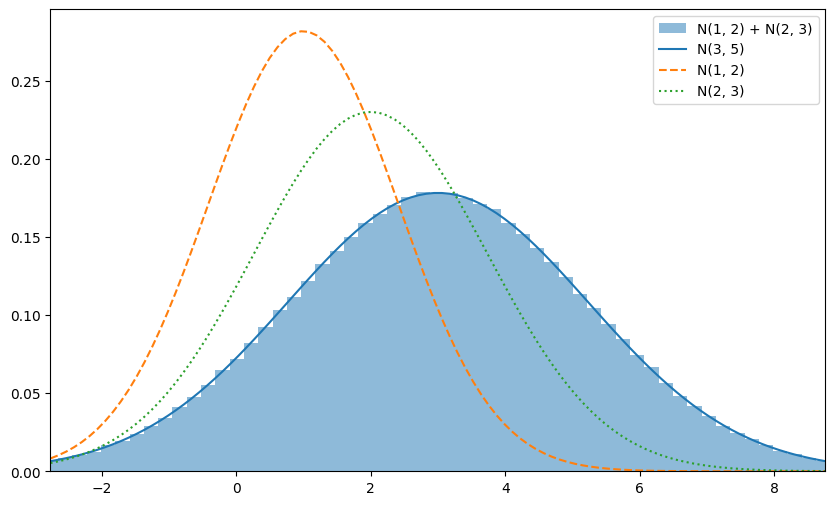

In [11]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

rv = stats.norm(3, np.sqrt(5))
xs = np.linspace(rv.isf(0.995), rv.isf(0.005), 100)

ax.hist(sum_sample, bins=100, density=True,
        alpha=0.5, label='N(1, 2) + N(2, 3)',
        color='#1f77b4')
ax.plot(xs, rv.pdf(xs), label='N(3, 5)')
ax.plot(xs, rv1.pdf(xs), label='N(1, 2)', ls='--')
ax.plot(xs, rv2.pdf(xs), label='N(2, 3)', ls=':')
ax.set_xlim(rv.isf(0.995), rv.isf(0.005))
ax.legend()

plt.show()
print('[그림 9-1] 정규분포의 합의 분포')

- $X+Y\overset{\underset{\mathrm{OK}}{}}{∼}N(3,5)$

- $n$개의 합으로 일반화

> **정규분포의 합의 분포**

> 서로 독립인 확률변수,<br>
> $X_{1}∼N(μ_{1},σ_{1}^2)$, $X_{2}∼N(μ_{2},σ_{2}^2)$, $⋯$, $X_{n}∼N(μ_{n},σ_{n}^2)$에 대하여<br><br>
>
> $$
> \sum_{i=1}^{n}{X_{i}} ∼ N(\sum_{i=1}^{n}{μ_{i}}, \sum_{i=1}^{n}{σ_{i}^2})
> \tag{9-8}
> $$<br>
>
> 이 성립한다.

#### 2) 포아송 분포의 합의 분포

- $X∼Poi(3),\;Y∼Poi(4)\;→\;X+Y\;?$

- $E(X+Y)=E(X)+E(Y)=7$<br>$V(X+Y)=V(X)+V(Y)=7$

- 무작위추출로 확인

In [12]:
rv1 = stats.poisson(3)
rv2 = stats.poisson(4)

size = 1000000
X_sample = rv1.rvs(size)
Y_sample = rv2.rvs(size)
sum_sample = X_sample + Y_sample

np.mean(sum_sample), np.var(sum_sample)

[그림 9-1] 정규분포의 합의 분포


(6.999034, 6.989995066843997)

- 이론값에 수렴

- 포아송 분포의 재생성 $→$ $X+Y∼Poi(7)$

- 파이썬 확인

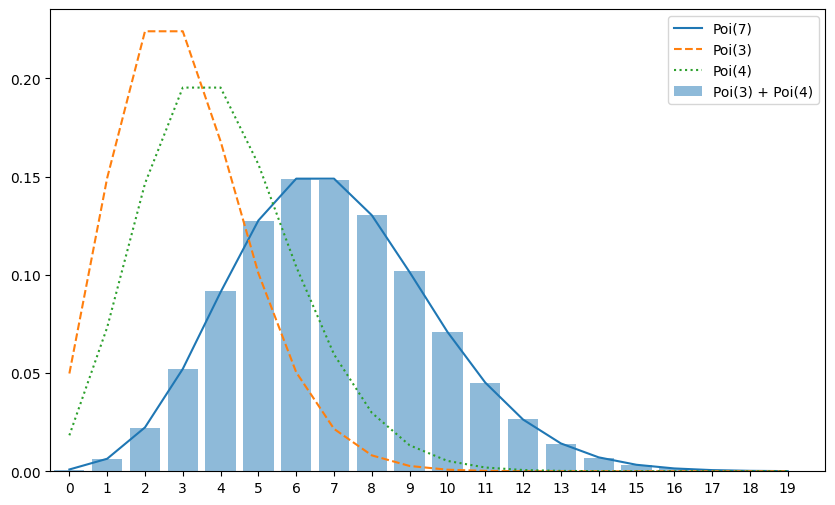

[그림 9-2] 포아송 분포의 합의 분포


In [13]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

rv = stats.poisson(7)
xs = np.arange(20)

hist, _ = np.histogram(sum_sample, bins=20,
                       range=(0, 20), density=True)
ax.bar(xs, hist, alpha=0.5,
       label='Poi(3) + Poi(4)', color='#1f77b4')
ax.plot(xs, rv.pmf(xs), label='Poi(7)')
ax.plot(xs, rv1.pmf(xs), label='Poi(3)', ls='--')
ax.plot(xs, rv2.pmf(xs), label='Poi(4)', ls=':')

ax.legend()
ax.set_xlim(-0.5, 20)
ax.set_xticks(np.arange(20))

plt.show()
print('[그림 9-2] 포아송 분포의 합의 분포')

- $X+Y\overset{\underset{\mathrm{OK}}{}}{∼}Poi(7)$

- $n$개의 합으로 일반화

> **포아송 분포의 합의 분포**

> 서로 독립인 확률변수,<br>
> $X_{1}∼Poi(λ_{1})$, $X_{2}∼Poi(λ_{2})$, $⋯$, $X_{n}∼Poi(λ_{n})$에 대하여<br><br>
>
> $$
> \sum_{i=1}^{n}{X_{i}} ∼ Poi(\sum_{i=1}^{n}{λ_{i}})
> \tag{9-9}
> $$<br>
>
> 가 성립한다.

#### 3) 베르누이 분포의 합의 분포

- $X_{1}, X_{2}, ⋯, X_{10} \overset{iid}{∼} Bern(0.3)\;→\;\sum_{i=1}^{10}{X_{i}}\;?$

- $E(\sum_{i=1}^{10}{X_{i}})=\sum_{i=1}^{10}{E(X_{i})}=10×0.3=3$<br>$V(\sum_{i=1}^{10}{X_{i}})=\sum_{i=1}^{10}{V(X_{i})}=10×0.3×(1-0.3)=2.1$

- 무작위추출로 확인

In [14]:
p = 0.3
rv = stats.bernoulli(p)
n, size = 10, 1000000
Xs_sample = rv.rvs((n, size))
sum_sample = np.sum(Xs_sample, axis=0)

np.mean(sum_sample), np.var(sum_sample)

(2.999494, 2.0946717439639984)

- 이론값에 수렴

- 재생성 無

- $\sum_{i=1}^{10}{X_{i}}∼B(10,0.3)$

- 파이썬 확인

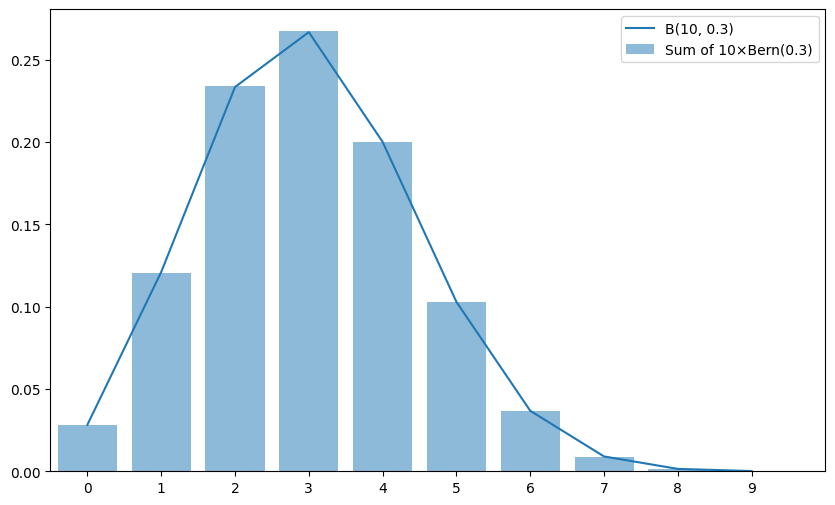

[그림 9-3] 베르누이 분포의 합의 분포


In [15]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

rv = stats.binom(10, p)
xs = np.arange(10)
hist, _ = np.histogram(sum_sample, bins=10,
                       range=(0, 10), density=True)
ax.bar(xs, hist, alpha=0.5, label=f'Sum of {n}×Bern({p})')
ax.plot(xs, rv.pmf(xs), label=f'B({n}, {p})')
ax.legend()
ax.set_xlim(-0.5, 10)
ax.set_xticks(np.arange(10))

plt.show()
print('[그림 9-3] 베르누이 분포의 합의 분포')

> **베르누이 분포의 합의 분포**

> $X_{1}, X_{2}, ⋯, X_{10} \overset{iid}{∼} Bern(0.3)$에 대하여<br><br>
>
> $$
> \sum_{i=1}^{n}{X_{i}} ∼ B(n, p)
> \tag{9-10}
> $$<br>
>
> 가 성립한다.

### 9-3. 표본평균의 분포

- $X_{1}, X_{2}, ⋯, X_{n} \overset{iid}{∼} F\;\;→\;\;\bar{X}=\cfrac{X_{1}+X_{2}+⋯+X_{n}}{n}\;?$

- 추정 / 검정

- 중심극한정리 / 큰 수의 법칙

- 기대값

$$
\begin{align}
E(\bar{X}) & = E\left( \frac{X_{1}+X_{2}+⋯+X_{n}}{n} \right) \\\\
& = \frac{E(X_{1})+E(X_{2})+⋯+E(X_{n})}{n} \\\\
& = \frac{nμ}{n} \\\\
& = μ
\end{align}
$$

- 분산
  - $V(aX)=a^2V(X)$

$$
\begin{align}
V(\bar{X}) & = V\left( \frac{X_{1}+X_{2}+⋯+X_{n}}{n} \right) \\\\
& = \frac{V(X_{1})+V(X_{2})+⋯+V(X_{n})}{n^2} \\\\
& = \frac{nσ^2}{n^2} \\\\
& = \frac{σ^2}{n}
\end{align}
$$

- 정리

> **표본평균의 기대값과 분산**

> 확률변수 $X_{1}$, $X_{2}$, $⋯$, $X_{n}$이 서로 독립이고, 기대값이 $μ$, 분산이 $σ^2$인 확률분포 $F$를 따를 때<br><br>
>
> $$
> \begin{align}
> E(\bar{X}) & = μ \\\\
> V(\bar{X}) & = \frac{σ^2}{n}
> \end{align}
> \tag{9-11}
> $$<br>
>
> 이 성립한다.

#### 1) 정규분포의 표본평균의 분포

- $X_{1}, X_{2}, ⋯, X_{10} \overset{iid}{∼}N(1,2)\;→\;\bar{X}\;?$

- $E(\bar{X})=1,\;\;V(\bar{X})=\frac{2}{10}$

- 무작위추출로 확인

In [16]:
mean = 1
var = 2
rv = stats.norm(mean, np.sqrt(var))

n, size = 10, 1000000
Xs_sample = rv.rvs((n, size))
sample_mean = np.mean(Xs_sample, axis=0)

np.mean(sample_mean), np.var(sample_mean)

(0.9995466511402974, 0.19942119653587653)

- $\bar{X}∼N(1,\frac{2}{10})$

- 파이썬 확인

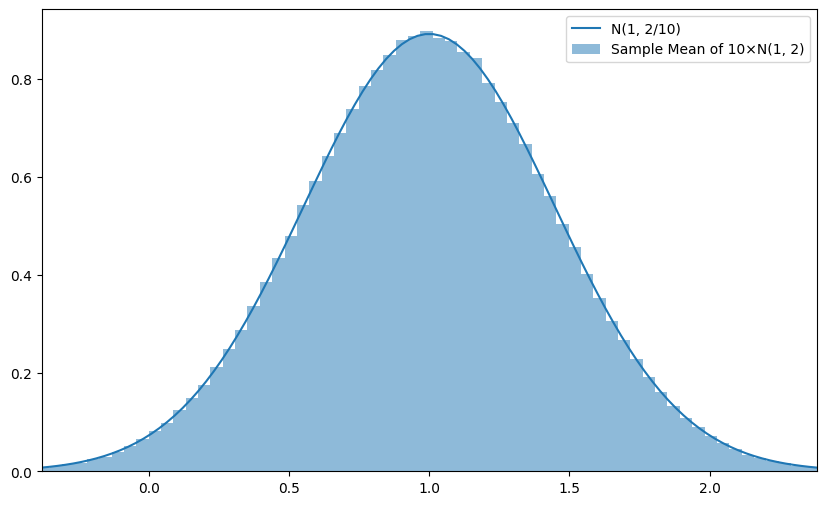

[그림 9-4] 정규분포의 표본평균의 분포


In [17]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

rv_true = stats.norm(mean, np.sqrt(var/n))
xs = np.linspace(rv_true.isf(0.999), rv_true.isf(0.001), 100)
ax.plot(xs, rv_true.pdf(xs), label=f'N({mean}, {var}/{n})')
ax.hist(sample_mean, bins=100, density=True,
        alpha=0.5, label=f'Sample Mean of {n}×N({mean}, {var})',
        color='#1f77b4')

ax.legend()
ax.set_xlim(rv_true.isf(0.999), rv_true.isf(0.001))
plt.show()
print('[그림 9-4] 정규분포의 표본평균의 분포')

- 정리

> **정규분포의 표본평균의 분포**

> $X_{1}, X_{2}, ⋯, X_{10} \overset{iid}{∼} N(μ,σ^2)$이라고 할 때<br><br>
>
> $$
> \bar{X} ∼ N(μ,\,\frac{σ^2}{n})
> \tag{9-12}
> $$<br>
>
> 이 성립한다.

#### 2) 포아송 분포의 표본평균의 분포

- $X_{1}, X_{2}, ⋯, X_{10} \overset{iid}{∼} Poi(3)\;→\;\bar{X}\;?$

- $E(\bar{X})=3,\;\;V(\bar{X})=\frac{3}{10}$

- 무작위추출로 확인

In [18]:
lam = 3
rv = stats.poisson(lam)

n, size = 10, 1000000
Xs_sample = rv.rvs((n, size))
sample_mean = np.mean(Xs_sample, axis=0)

np.mean(sample_mean), np.var(sample_mean)

(2.9991454, 0.30001874965884007)

- $\bar{X} \nsim Poi(λ)$
  - 재생성 무효

- $\bar{X}$의 히스토그램

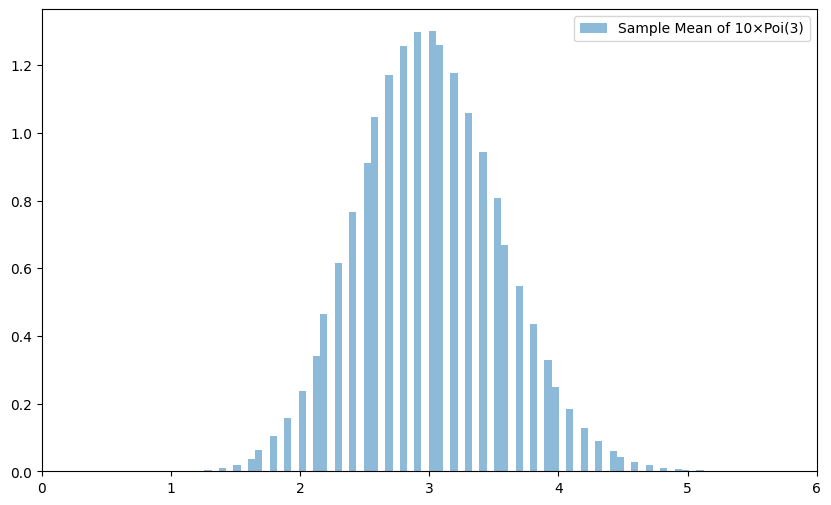

[그림 9-5] 포아송 분포의 표본평균의 분포


In [19]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

ax.hist(sample_mean, bins=100, density=True,
        alpha=0.5, label=f'Sample Mean of {n}×Poi({lam})')

ax.legend()
ax.set_xlim(0, 6)

plt.show()
print('[그림 9-5] 포아송 분포의 표본평균의 분포')

- 정규분포 형태
  - 중심극한정리

#### 3) 중심극한정리

- $\sum_{i=1}^{n}{X_{i}},\quad\bar{X}=\frac{1}{n}\sum_{i=1}^{n}{X_{i}}$

- 기대값/분산 OK
  - 분포 ?

- $\sum_{i=1}^{n}{X_{i}} →$ 재생성 필요

- $\bar{X} →$ 재생성 무효

- $\bar{X} →$ **중심극한정리**(central limit theorem)

> **중심극한정리**

> 확률변수 $X_{1}$, $X_{2}$, $⋯$, $X_{n}$이
> - 서로 독립이고, 평균이 $μ$, 분산이 $σ^2$인 확률분포 $F$를 따를 때,
> - $n$이 커짐에 따라, 표본평균 $\bar{X}$의 분포는 정규분포 $N(μ, \frac{σ^2}{n})$에 가까워진다.

- $X ∼ ∀F(μ, σ^2) → \bar{X} ∼ N(μ, \frac{σ^2}{n}), \; \text{if n is large}$

- **모든 확률분포 중 가장 중요한 분포**

- $X_{1}, X_{2}, ⋯, X_{10000} \overset{iid}{∼}Poi(3)$

- 표본평균 계산 $10000$번

In [20]:
lam = 3
rv = stats.poisson(lam)

n, size = (10000, 10000)
Xs_sample = rv.rvs((n, size))
sample_mean = np.mean(Xs_sample, axis=0)

- $\bar{X} ∼ N(3,\frac{3}{10000})$

- 파이썬 확인

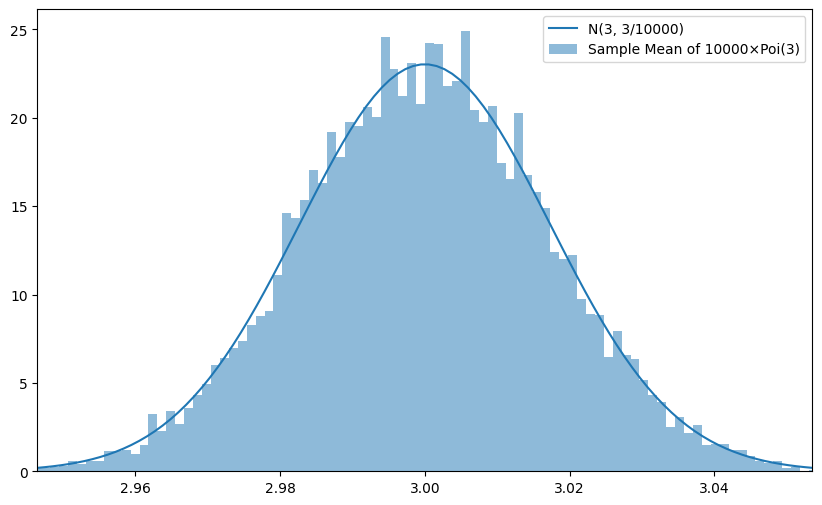

[그림 9-6] 중심극한정리


In [21]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

rv_true = stats.norm(lam, np.sqrt(lam/n))
xs = np.linspace(rv_true.isf(0.999), rv_true.isf(0.001), 100)

ax.plot(xs, rv_true.pdf(xs), label=f'N({lam}, {lam}/{n})')
ax.hist(sample_mean, bins=100, density=True,
        alpha=0.5, label=f'Sample Mean of {n}×Poi(3)',
        color='#1f77b4')

ax.legend()
ax.set_xlim(rv_true.isf(0.999), rv_true.isf(0.001))

plt.show()
print('[그림 9-6] 중심극한정리')

- 정규분포의 형태

#### 4) 큰 수의 법칙

- 또 하나의 중요한 법칙

- $\bar{X} → μ \quad\; \text{as} \;\; n → ∞$

- 주사위 눈의 확률 $=\cfrac{1}{6}$

> **큰 수의 법칙**

> 확률변수 $X_{1}$, $X_{2}$, $⋯$, $X_{n}$이
> - 서로 독립이고, 평균이 $μ$, 분산이 $σ^2$일 것 같은 확률분포를 따를 때,
> - $n$이 커짐에 따라 표본평균은 $μ$에 수렴한다.

- 주사위 눈 $∼ Bern(\frac{1}{6})$

- 무작위 추출 네 번 시행

In [22]:
p = 1/6
rv = stats.bernoulli(p)

n = 100000
sample = rv.rvs((n, 4))

- 표본크기 vs 표본평균

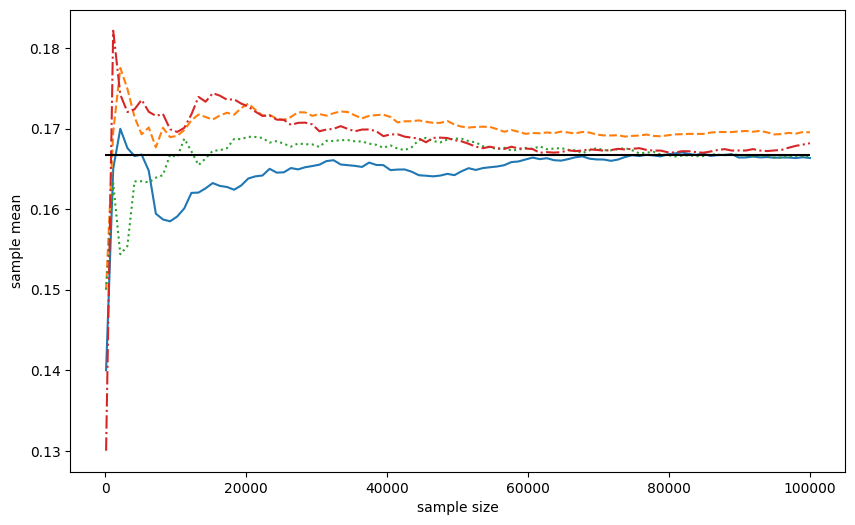

[그림 9-7] 큰 수의 법칙


In [23]:
space = np.linspace(100, n, 100).astype(int)
plot_list = np.array([np.mean(sample[:sp], axis=0)
                      for sp in space]).T

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

for pl, ls in zip(plot_list, linestyles):
    ax.plot(space, pl, ls=ls)
ax.hlines(p, -1, n, 'k')
ax.set_xlabel('sample size')
ax.set_ylabel('sample mean')

plt.show()
print('[그림 9-7] 큰 수의 법칙')

- 모두 $\frac{1}{6}$에 수렴